In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
path =  "/content/drive/MyDrive/Colab Notebooks/midterm-assignment/"

#Problem2
We consider lasso, where the square loss, and the L1 regularization are employed for linear regres- sion. In this problem, we employ proximal gradient method (PG). So as to make the discussion simple, we use the following objective:

wˆ=argminw((w−μ)⊤A(w−μ)+λ||w||1)

Implement PG for lasso and show the results in a couple of conditions. In this question, use the same learning rate ηt = L−1, where L depicts the Lipsitz constant of the gradient of the objective, which is derived from the Hessian matrix 2A (i.e. use the maximum eigen value of 2A as the inverse of the learning rate: η−1).

線形回帰のために二乗損失とL1正則化を採用したlassoを考える。この問題ではproximal gradient method (PG)を採用する。議論を簡単にするために、以下の目的を使用する。
()
wˆ=argmin (w-μ)⊤A(w-μ)+λ||w||1 . w
lassoのPGを実装し、いくつかの条件で結果を示す。この問題では、同じ学習率ηt = L-1を使用する。ここで、Lは目的の勾配のリプシッツ定数を表し、それはヘシアン行列2Aから導かれる（すなわち、2Aの最大固有値を学習率の逆数：η-1として使用する）。
1. PGの結果を、||w(t) - wˆ|| w.r.t. at the number of iterationで示しなさい。半ログプロットを用いる。以下の条件を用いる。
A= (3 0.5; 0.5 1) ,μ=(1; 2)
L1正則化の特性を検証するために、λ = 2, 4, 6で実験を行います。数値結果は、講義で使用したスライドに記載されていることを思い出してください。また、cvx (matlab) / cvxopt (python) を使って結果を確認することもできます。


In [ ]:
A = np.array([[3, 0.5],[0.5,1]])
h = 1/np.linalg.eigvals(2*A).max()
u = np.array([[1,2]],dtype=np.float128).T
d = 2
w = np.array([[3,-1]],dtype=np.float128).T

def f(w):
    return ((w-u).T@A@(w-u))[0,0]

def g(w):
    return l*np.abs(w).sum()

def df(w):
    return 2*A@(w-u)

def f_hat(x,y,h):
    return f(y)+df(y).T@(x-y)+1/(2*h)(x-y).T@(x-y)

def prox(x,l):
    ret = np.zeros((d,1),dtype=np.float128)
    for i in range(d):
        if x[i] > l*h:
            ret[i] = x[i] - l*h
        if x[i] < -l*h:
            ret[i] = x[i] + l*h
    return ret

def PG(A,l):
    ws = np.zeros((2,100),dtype=np.float128)
    w = np.array([[3,-1]],dtype=np.float128).T

    h = 1/np.linalg.eigvals(2*A.astype(np.float)).max()
    for i in range(100):
        ws[:,i] = w.ravel()
        w = prox(w-h*df(w),l)

    return w,ws

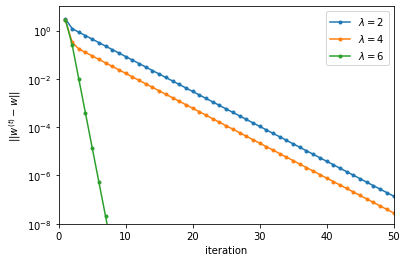

In [59]:
A = np.array([[3, 0.5],[0.5,1]],dtype=np.float128)

for l in [2,4,6]:
    w,ws = PG(A,l)
    plt.plot(np.arange(1,101),np.sqrt((ws[0,:]-ws[0,-1])**2+(ws[1,:]-ws[1,-1])**2),marker=".",label="$\lambda = {}$".format(l))

plt.yscale("log")
plt.xlabel("iteration")
plt.ylabel(r"$||w^{(t)}-w||$")
plt.legend()
plt.xlim((0,50))
plt.ylim((1e-8,1e+1))
plt.savefig(path+"2.png")
plt.show()
